<a href="https://colab.research.google.com/github/Nagmashaik123/MedConcepts/blob/main/ConceptHashTagFreqCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('MedicalDyfunctions.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

In [ ]:
dataFrame=df[['CUID','Concept','HashTags']]
dataFrame = dataFrame.dropna()

dataFrame.reset_index(drop=True)

In [ ]:
dictValue=dataFrame.to_dict('records')
dictValue

In [ ]:
with open("testJson.json", "w") as outfile: 
    json.dump(dictValue, outfile)

In [1]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_trf_xlnetbasecased_lg-2.2.0/en_trf_xlnetbasecased_lg-2.2.0.tar.gz

     |████████████████████████████████| 433.9MB 36kB/s 
  Created wheel for en-trf-xlnetbasecased-lg: filename=en_trf_xlnetbasecased_lg-2.2.0-cp37-none-any.whl size=433910391 sha256=6e3446eff4ea7b93b79f49ffd037ab0ca981a74b03ef767006bc5b7775734017
  Stored in directory: /root/.cache/pip/wheels/7a/f2/db/a5338163c689e22f8567d2890e8340f5f989fb46c2d7e71493
Successfully built en-trf-xlnetbasecased-lg


In [2]:
!pip install contextualSpellCheck

In [4]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 1.6MB 4.3MB/s 
     |████████████████████████████████| 819kB 37.2MB/s 
Requirement already up-to-date: wheel in /usr/local/lib/python3.7/dist-packages (0.36.2)
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0


2021-07-09 15:23:59.203929: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 13.6 MB 1.5 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
import contextualSpellCheck

nlp = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(nlp)
 #Income was $9.4 million compared to the prior year of $2.7 million.

In [6]:
import json
import csv
import glob

jsonList = [{"CUID": "C0002884", "Concept": "Hypochromic anemia", "HashTags": "hypochromicanemia,, natural,, healthcare,, chlorosis,, anemia"},
            {"CUID": "C0002884", "Concept": "Hypochromic anemia", "HashTags": "HypochromicAnemia"},
            {"CUID": "C0002884", "Concept": "Hypochromic anemia", "HashTags": "Chlorosis, TheHulk, HypochromicAnemia"},
            {"CUID": "C0014431", "Concept": "Enzyme Induction", "HashTags": "enzymeinduction, hangovercure"},
            {"CUID": "C0014431", "Concept": "Enzyme Induction", "HashTags": "enzymeinduction, hangovercure"},
            {"CUID": "C0014431", "Concept": "Enzyme Induction", "HashTags": "CholesterolLowering, EnzymeInduction"}]

dictConcept={}

def conceptHashTagCount():
    for eachJson in jsonList:
        concept= eachJson['Concept']
        hashTags=eachJson['HashTags']
        if concept not in dictConcept.keys():
            dictHashTags={}
            dictConcept[concept]=getdictHashTags(hashTags,dictHashTags)
        else:
            existingHashTagDic = dictConcept[concept]
            dictConcept[concept]=getdictHashTags(hashTags,existingHashTagDic)
def getdictHashTags(hashTags,dictHashTags):
    # print(hashTags)

    hashTagList = hashTags.split(', ')
    for hashTag in hashTagList:
        hashTag=hashTag.lower()
        if hashTag.endswith(','):
            hashTag=hashTag[:-1]

        if hashTag not in dictHashTags.keys():
            dictHashTags[hashTag] = 1
        else:
            dictHashTags[hashTag] = dictHashTags[hashTag] + 1
    return dictHashTags



conceptHashTagCount()
dictConcept

{'Enzyme Induction': {'cholesterollowering': 1,
  'enzymeinduction': 3,
  'hangovercure': 2},
 'Hypochromic anemia': {'anemia': 1,
  'chlorosis': 2,
  'healthcare': 1,
  'hypochromicanemia': 3,
  'natural': 1,
  'thehulk': 1}}

In [8]:
import pandas as pd
rows=[]
# appending rows
for concept, hashDict in dictConcept.items():
    for hashTag in hashDict.keys():
        row = {}
        row['Concept']=concept
        row['HashTag']=hashTag
        row['Frequency']=hashDict[hashTag]
        rows.append(row)

# using data frame
df = pd.DataFrame(rows)
df

,Concept,HashTag,Frequency
0,Hypochromic anemia,hypochromicanemia,3
1,Hypochromic anemia,natural,1
2,Hypochromic anemia,healthcare,1
3,Hypochromic anemia,chlorosis,2
4,Hypochromic anemia,anemia,1
5,Hypochromic anemia,thehulk,1
6,Enzyme Induction,enzymeinduction,3
7,Enzyme Induction,hangovercure,2
8,Enzyme Induction,cholesterollowering,1


In [14]:
doc = nlp('Income was $9.4 milion compared to the prior year of $2.7 milion.')
print(doc._.outcome_spellCheck)
df["spellings"] = df["HashTag"].apply(lambda x: (nlp(x)._.outcome_spellCheck))
df

Income was $9.4 million compared to the prior year of $2.7 million.


,Concept,HashTag,Frequency,spellings
0,From.,hypochromicanemia,3,
1,From.,natural,1,
2,From.,healthcare,1,
3,From.,chlorosis,2,the
4,From.,anemia,1,and
5,From.,thehulk,1,the
6,,enzymeinduction,3,
7,,hangovercure,2,
8,,cholesterollowering,1,


  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       30
1    B       20       25       15       25
2    C       12       15       19        6
3    D       10       29       13       19


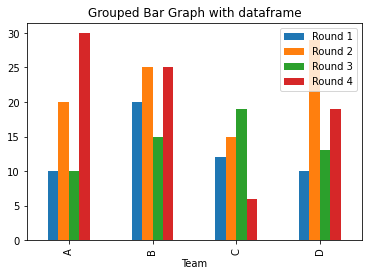

In [ ]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')
